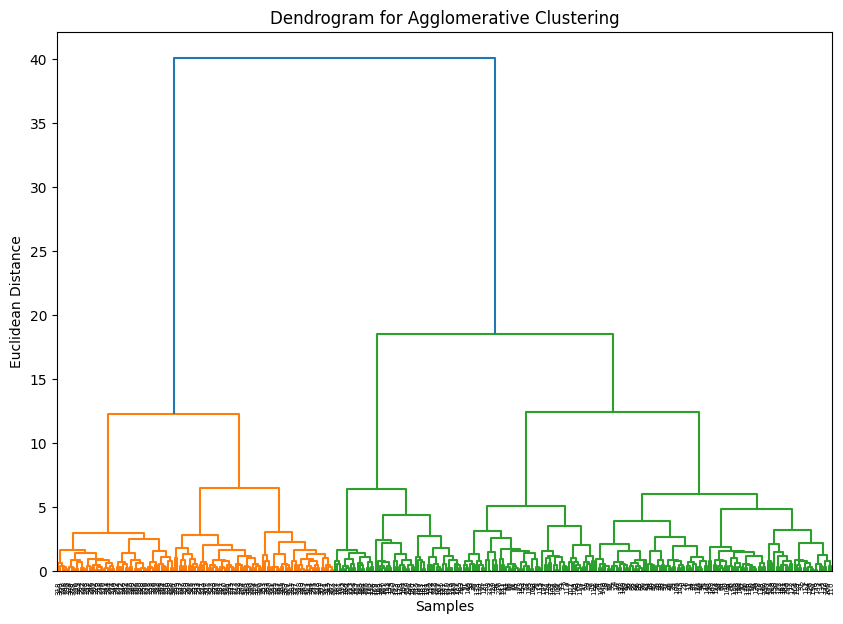

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('penguins.csv')


imputer = SimpleImputer(strategy='mean')
df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = imputer.fit_transform(
    df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
)


label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])


X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


linked = linkage(X_scaled, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()




agglom = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters = agglom.fit_predict(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'], c=clusters, cmap='viridis', label='Clusters')
plt.title('Agglomerative Clustering - Scatter Plot')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.colorbar(label='Cluster')
plt.show()
